Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import html
import nltk
import regex as re
import string
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
#!pip install spacy
#!python -m spacy download pt

Importar dados

In [2]:
data = pd.read_csv('C:/Users/Danilo/Desktop/Documentos Acadêmicos/TERA/TERAprojetos/Projeto final/BNCC/repo/bncc-classifier/data/curated/data_eda_treat_will.csv')


In [3]:
data_clone = data.copy()

In [5]:
# renomeando as colunas do dataset

data_clone.columns = ['id', 'questoes', 'tipoQuestoes', 'topico', 'slug', 'materia', 'slug.1','etapaEnsino']
data_clone.head()

,id,questoes,tipoQuestoes,topico,slug,materia,slug.1,etapaEnsino
0,3486670,<p>Com base em seus conhecimentos sobre o comp...,2,História da Arte,historia-da-arte,Arte,arte,Fundamental II
1,3343927,"<p>&ldquo;Achar um n&uacute;mero que, somado c...",2,Álgebra: Equações do 2º grau: Equação do 2º gr...,algebra-equacoes-do-2o-grau-equacao-do-2o-grau...,Matemática,matematica,Fundamental II
2,3691951,"<p style=""padding:0px;margin:10px 0px 0px;outl...",2,Outros,outros,Química,quimica,Fundamental II
3,2016466,<p><strong>Anexe nesse espa&ccedil;o uma foto ...,4,Proposta,proposta,Língua Portuguesa,redacao,Fundamental I
4,1744035,<p>Pagina nr. 54 do Livro did&aacute;tico.</p>,4,Idade Moderna: Revolução Francesa: Antecedente...,idade-moderna-revolucao-francesa-antecedentes-...,História,historia,Fundamental II


## Pre-processamento

* Escrevendo funcões para etapa de pre-processamento de Texto usando regex 

In [28]:
# Função para remover tags de html usando regex

def remove_tags(text: str) -> str:
    pattern = re.compile("<.*?>")
    cleantext = re.sub(pattern, " ", text).replace(u"\xa0", u" ")
    return cleantext

# Função para deixar todo o texto em caixa baixa
def to_lower(text: str) -> str:
    return text.lower()

# Função para remover numeros
def remove_numbers(text: str) -> str:
    pattern = re.compile("[0-9]+")
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover stopwords em portugues; preposições, conjunções, artigos, etc
def remove_standard_stopwords_pt(text: str) -> str:
    stop_words = set(stopwords.words("portuguese"))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    final_sentence = " ".join(filtered_sentence)
    return final_sentence  

def remove_standard_stopwords_en(text: str) -> str:
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    final_sentence = " ".join(filtered_sentence)
    return final_sentence  

# Função para remover caracteres especiais e pontuação
def remove_punctuation(text: str) -> str:
    pattern = re.compile("[\d\.\,\*):(\?\/\-\]\[\–]")
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas em itálico
def remove_italic_dquotes(text: str) -> str:
    pattern = re.compile(r'"')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_open_dquotes(text: str) -> str:
    pattern = re.compile(r'“')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_end_dquotes(text: str) -> str:
    pattern = re.compile(r'”')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_italic_quotes(text: str) -> str:
    pattern = re.compile(r"'")
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_open_quotes(text: str) -> str:
    pattern = re.compile(r'‘')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_end_quotes(text: str) -> str:
    pattern = re.compile(r'’')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

# Função para remover aspas de abertura
def remove_quote(text: str) -> str:
    pattern = re.compile(r'‛')
    clean_text = re.sub(pattern, " ", text)
    return clean_text

In [29]:
# resolve problema de codificação html da coluna 'questoes'
data_clone['questoes_html']= data_clone['questoes'].astype('str').apply(html.unescape)

# limpando o texto utilizando as funçoes criadas
data_clone['questoes_tags'] = data_clone['questoes_html'].apply(remove_tags)
data_clone['questoes_lower'] = data_clone['questoes_tags'].apply(to_lower)
data_clone['questoes_numbers'] = data_clone['questoes_lower'].apply(remove_numbers)

In [33]:
### limpando pontuações e todos os tipos de aspas

data_clone['questoes_punct'] = data_clone['questoes_numbers'].apply(remove_punctuation)

data_clone['questoes_no_italic_quotes'] = data_clone['questoes_punct'].apply(remove_italic_quotes)
data_clone['questoes_no_open_quotes'] = data_clone['questoes_no_italic_quotes'].apply(remove_open_quotes)
data_clone['questoes_no_end_quotes'] = data_clone['questoes_no_open_quotes'].apply(remove_end_quotes)

data_clone['questoes_no_italic_dquotes'] = data_clone['questoes_no_end_quotes'].apply(remove_italic_dquotes)
data_clone['questoes_no_open_dquotes'] = data_clone['questoes_no_italic_dquotes'].apply(remove_open_dquotes)
data_clone['questoes_no_end_dquotes'] = data_clone['questoes_no_open_dquotes'].apply(remove_end_dquotes)

data_clone['questoes_no_quotes'] = data_clone['questoes_no_end_dquotes'].apply(remove_quote)

In [31]:
data_clone['questoes_no_quotes'][0]

' com base em seus conhecimentos sobre o compositor john cage  analise as seguintes afirmativas     i   sua composição intitulada        faz o público refletir sobre o que é música  silêncio e paisagem sonora    ii   os músicos que tocam essa composição são orientados a não executar uma nota sequer durante quatro minutos e trinta e três segundos    iii   para john cage  o silêncio absoluto não existe porque tudo se move    marque a alternativa correta  '

In [34]:
### Removendo stopwords em portugues

stop_pt = stopwords.words('portuguese')

text_pt = data_clone['questoes_no_quotes']

test = pd.DataFrame(text_pt)
test.columns = ["text"]

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test['text_without_stopwords'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_pt)]))
data_clone['questoes_stopw_pt'] = test['text_without_stopwords']

data_clone['questoes_stopw_pt'][0]

'base conhecimentos sobre compositor john cage analise seguintes afirmativas i composição intitulada faz público refletir sobre música silêncio paisagem sonora ii músicos tocam composição orientados executar nota sequer durante quatro minutos trinta três segundos iii john cage silêncio absoluto existe porque tudo move marque alternativa correta'

In [35]:
### Removendo stopwords em inglês

stop_en = stopwords.words('english')

text_en = data_clone['questoes_stopw_pt']

test_en = pd.DataFrame(text_en)
test_en.columns = ["text"]

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test_en['text_without_stopwords'] = test_en['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_en)]))
data_clone['questoes_stopw_en'] = test_en['text_without_stopwords']

data_clone['questoes_stopw_en'][52179]  ## exemplo de texto em inglês p/ verificar modificação

42333                                 atividades pendentes
79365    filme menina ouro conta história maggie fitzge...
52179      name furniture english nome móvel abaixo inglês
4090     bloco massa kg jogado alto atinge ponto máximo...
51493    leia alternativas seguir sobre fundamentos han...
Name: questoes_stopw_en, dtype: object

In [36]:
data_clone['questoes_stopw_en'][58131]

'uel pr cuidadosos dentre metafísicos ocorreu duvidar aqui limiar onde necessário haviam jurado si próprios omnibus dubitandum tudo duvidar todo valor possa merecer verdadeiro veraz desinteressado possível deva atribuir aparência vontade engano egoísmo cobiça valor alto fundamental vida possível constitui valor dessas coisas boas honradas consista exatamente serem insidiosamente aparentadas atadas unidas talvez essencialmente iguais coisas ruins aparentemente opostas talvez! mostra disposto ocupar tais perigosos talvez preciso esperar advento nova espécie filósofos gosto pendor diversos contrários daqueles agora existiram filósofos perigoso talvez todo custo falando toda seriedade vejo filósofos surgirem nietzsche f além bem mal marcondes textos básicos filosofia présocráticos wittgenstein ed rev rio janeiro zahar p partir citação acima assinale correto'

Tokenizaçao das Questoes usando NLTK

In [37]:
data_clone['questoes_tokens'] = data_clone['questoes_stopw_en'].apply(word_tokenize)
data_clone['questoes_tokens'].head()

0    [base, conhecimentos, sobre, compositor, john,...
1    [achar, número, somado, igual, inverso, equaçõ...
2    [chuva, ácida, fenômeno, provocado, poluição, ...
3             [anexe, nesse, espaço, foto, ilustração]
4                        [pagina, nr, livro, didático]
Name: questoes_tokens, dtype: object

In [38]:
data_tokens = pd.DataFrame(data_clone['questoes_tokens'])
data_tokens

,questoes_tokens
0,"[base, conhecimentos, sobre, compositor, john,..."
1,"[achar, número, somado, igual, inverso, equaçõ..."
2,"[chuva, ácida, fenômeno, provocado, poluição, ..."
3,"[anexe, nesse, espaço, foto, ilustração]"
4,"[pagina, nr, livro, didático]"
...,...
83670,"[leia, reportagem, responda, questão, sobre, p..."
83671,"[responder, questão, leia, trecho, conto, pref..."
83672,"[pais, surgiu, skate]"
83673,"[machos, fêmeas, mosquitos, gênero, aedes, viv..."


### Lemmatização

In [42]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data_clone['lemmatized_tokens'] = data_clone['questoes_stopw_en'].apply(lemmatize_text)

data_clone['lemmatized_tokens'] = data_clone['lemmatized_tokens'].apply(" ".join)

data_clone['lemmatized_tokens'].sample(3)

19686    teatro possui forma circular semicircular onde...
73653    observe imagem roupa acessórios usados persona...
55172    acabamos comemorar menor desmatamento floresta...
Name: lemmatized_tokens, dtype: object

<AxesSubplot:xlabel='lemmatized_tokens', ylabel='Count'>

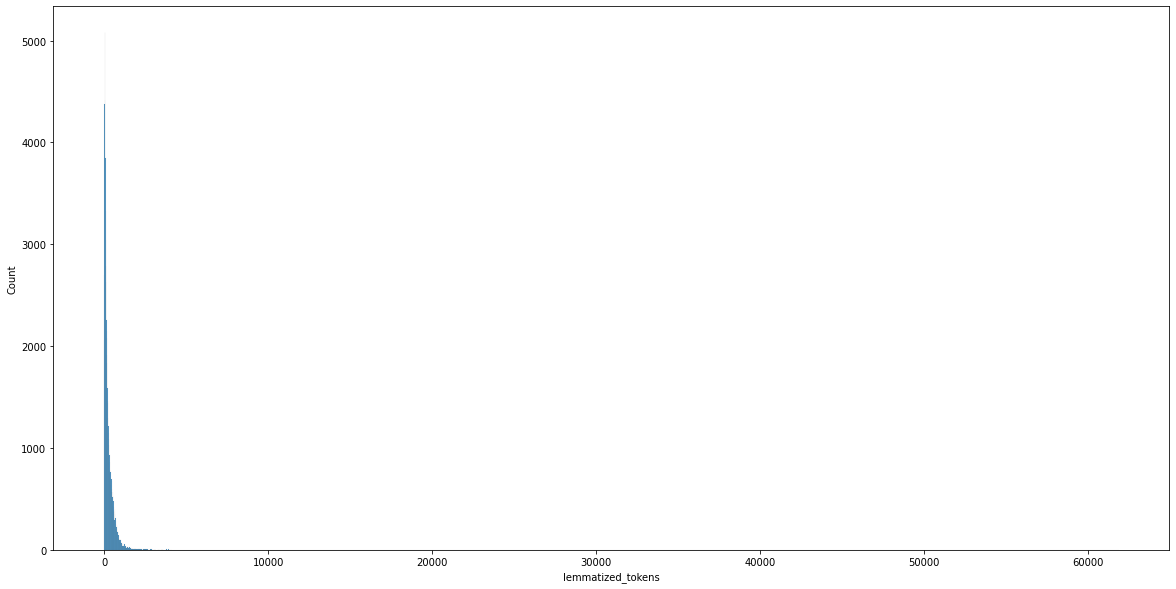

In [64]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.histplot(data_clone['lemmatized_tokens'].str.len(), ax = ax)

In [43]:
data_clone['lemmatized_tokens'][70291]

'veja foto escultura vênus willendorf analise itens vêm sequência escultura pré histórica demonstra figura feminina retratada toda exuberância seios ventre fartos quais características valorizadas nesse período histórico ii inspirou padrão beleza grego iii provável figura idealizada representar fertilidade perpetuação espécie humana corretos'

### Enconding with BOW

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizerBOW = CountVectorizer()
XBOW = vectorizerBOW.fit_transform(data_clone['lemmatized_tokens'])
XBOW

<83675x124300 sparse matrix of type '<class 'numpy.int64'>'
	with 2462464 stored elements in Compressed Sparse Row format>

### Enconding with TF-IDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizerTF = TfidfVectorizer()
XTF = vectorizerTF.fit_transform(data_clone['lemmatized_tokens'])
XTF


<83675x124300 sparse matrix of type '<class 'numpy.float64'>'
	with 2462464 stored elements in Compressed Sparse Row format>

### Clusterizando com t-SNE

In [35]:
from sklearn.manifold import TSNE

X_embedded_BOW = TSNE(n_components=3, learning_rate='auto',init='random').fit_transform(XBOW) 
X_embedded_BOW.shape

### Criando modelo para Etapa de Ensino

In [72]:
from sklearn.model_selection import train_test_split

y = data_clone['etapaEnsino']

X = data_clone['lemmatized_tokens']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

XBOW_train, XBOW_test, y_train, y_test = train_test_split(XBOW, y, test_size=0.33, random_state=42)

XTF_train, XTF_test, y_train, y_test = train_test_split(XTF, y, test_size=0.33, random_state=42)

In [54]:
data_clone.columns

Index(['id', 'questoes', 'tipoQuestoes', 'topico', 'slug', 'materia', 'slug.1',
       'etapaEnsino', 'questoes_html', 'questoes_tags', 'questoes_lower',
       'questoes_numbers', 'questoes_punct', 'questoes_no_italic_quotes',
       'questoes_no_open_quotes', 'questoes_no_end_quotes',
       'questoes_no_italic_dquotes', 'questoes_no_open_dquotes',
       'questoes_no_end_dquotes', 'questoes_stopw_pt', 'questoes_stopw_en',
       'questoes_no_quotes', 'questoes_tokens', 'lemmatized_tokens'],
      dtype='object')

In [55]:
data_clone['questoes_no_quotes'].str.len().max()

63829

In [56]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [57]:
sgd_clf = SGDClassifier(random_state=123)
sgf_clf_scores = cross_val_score(sgd_clf, XTF_train, y_train, cv=5)
print(sgf_clf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (sgf_clf_scores.mean(), sgf_clf_scores.std() * 2))

[0.67047177 0.67858735 0.67088833 0.66910453 0.67704245]
Accuracy: 0.67 (+/- 0.01)


In [59]:
y_train.value_counts()

Médio & Pré-Vestibular    22250
Fundamental II            21856
Fundamental I             11956
Name: etapaEnsino, dtype: int64

In [62]:
sgf_clf_pred = cross_val_predict(sgd_clf, XTF_train, y_train, cv=5)
print(confusion_matrix(y_train, sgf_clf_pred))

[[ 7795  3030  1131]
 [ 2374 13140  6342]
 [  759  4684 16807]]


In [63]:
grid = {'fit_intercept': [True,False],
        'early_stopping': [True, False],
        'loss' : ['hinge', 'log', 'squared_hinge'],
        'penalty' : ['l2', 'l1', 'none']}
search = GridSearchCV(estimator=sgd_clf, param_grid=grid, cv=5)
search.fit(XTF_train, y_train)
search.best_params_

C:\Users\Danilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Danilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Danilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Danilo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

{'early_stopping': False,
 'fit_intercept': False,
 'loss': 'log',
 'penalty': 'none'}

In [65]:
grid_sgd_clf_scores = cross_val_score(search.best_estimator_, XTF_train, y_train, cv=5)
print(grid_sgd_clf_scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (grid_sgd_clf_scores.mean(), grid_sgd_clf_scores.std() * 2))

[0.681352   0.68358156 0.67508027 0.68230467 0.68703175]
Accuracy: 0.68 (+/- 0.01)


In [73]:
pipe = Pipeline([('vectoriser', vectorizerTF),
                 ('classifier', search.best_estimator_)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectoriser', TfidfVectorizer()),
                ('classifier',
                 SGDClassifier(fit_intercept=False, loss='log', penalty='none',
                               random_state=123))])

In [74]:
y_test_pred = pipe.predict(X_test)
print("Accuracy: %0.2f" % (accuracy_score(y_test, y_test_pred)))
print(confusion_matrix(y_test, y_test_pred))

Accuracy: 0.69
[[4182 1420  490]
 [1218 6834 2531]
 [ 506 2370 8062]]
